# EXERCISE 1: Clustering 

Author name: Aradhya Goswami Class III BTECH DSE Section B Batch 1 Week 9


In [1]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

### a) Read and write a summary of the metadata

In [ ]:
data=pd.read_excel("Online Retail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = "%Y-%m-%d %H:%M")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### b) Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset

In [6]:
data.isnull().sum()*100/data.shape[0]
data = data.dropna()
df_time = data[(data.InvoiceDate>='2011-04-01') & (data.InvoiceDate<='2011-12-09')]


In [7]:
df_time.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df_time[df_time.duplicated()].shape
df_time = df_time.drop_duplicates(keep='first')
print((df_time.Quantity<0).sum())
print((df_time.UnitPrice<0).sum())

6430
0


### c) Calculate the RFM values for each customer (by customer id). RFM represents:


### 2) R (Recency) − Recency should be calculated as the number of months before he or she has madea purchase from the online store. If he/she made a purchase in the month of December2011,then the Recency should be 0. If purchase is made in November2011 then Recency should be 1and so on and so forth.

In [9]:
df_time['R'] = 12 - df_time.InvoiceDate.dt.month
df_time.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,R
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,8
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,8
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,8


### 3) F (Frequency) − Number of invoices by the customer from 01/04/ 2011 and 09/12/2011.

In [10]:
df_time['F'] = 0
customer_ids = list(df_time['CustomerID'].unique())
                    
for id in customer_ids:
    df_time.loc[df_time['CustomerID']==id, 'F'] += df_time.groupby(by='CustomerID').InvoiceNo.size()[id]

df_time.head()    

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,R,F
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8,66
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8,66
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,8,66
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,8,66
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,8,66


### 4) M (Monetary Value) − Total spend by the customer from 01/04/ 2011 and 09/12/2011.


In [11]:
df_time['Revenue'] = df_time.Quantity * df_time.UnitPrice
df_time['M'] = 0

for id in customer_ids:
    df_time.loc[df_time['CustomerID']==id, 'M'] += df_time.groupby(by='CustomerID').Revenue.sum()[id]
df_time.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,R,F,Revenue,M
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8,66,16.5,1311.26
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8,66,19.8,1311.26
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,8,66,10.2,1311.26
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,8,66,19.9,1311.26
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,8,66,15.3,1311.26


### a) Use the elbow method to identify how many customer segments exist, using the RFMvalues for each customer.

In [12]:
df_rfm = pd.DataFrame(customer_ids, columns=['CustomerID'])
df_rfm['R'] = 0
df_rfm['F'] = 0
df_rfm['M'] = 0

# updating value of each column
for id in customer_ids:
    df_rfm.loc[df_rfm['CustomerID']==id, 'R'] += df_time.loc[df_time['CustomerID']==id, 'R'].values[0]
    df_rfm.loc[df_rfm['CustomerID']==id, 'F'] += df_time.loc[df_time['CustomerID']==id, 'F'].values[0]
    df_rfm.loc[df_rfm['CustomerID']==id, 'M'] += df_time.loc[df_time['CustomerID']==id, 'M'].values[0]

### 5) values for each customer. 



### a) Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

### 6) from sklearn.cluster import KMeans

### a. Plot the clusters in a scatter plot and mark each segment differently using lmplot

In [13]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


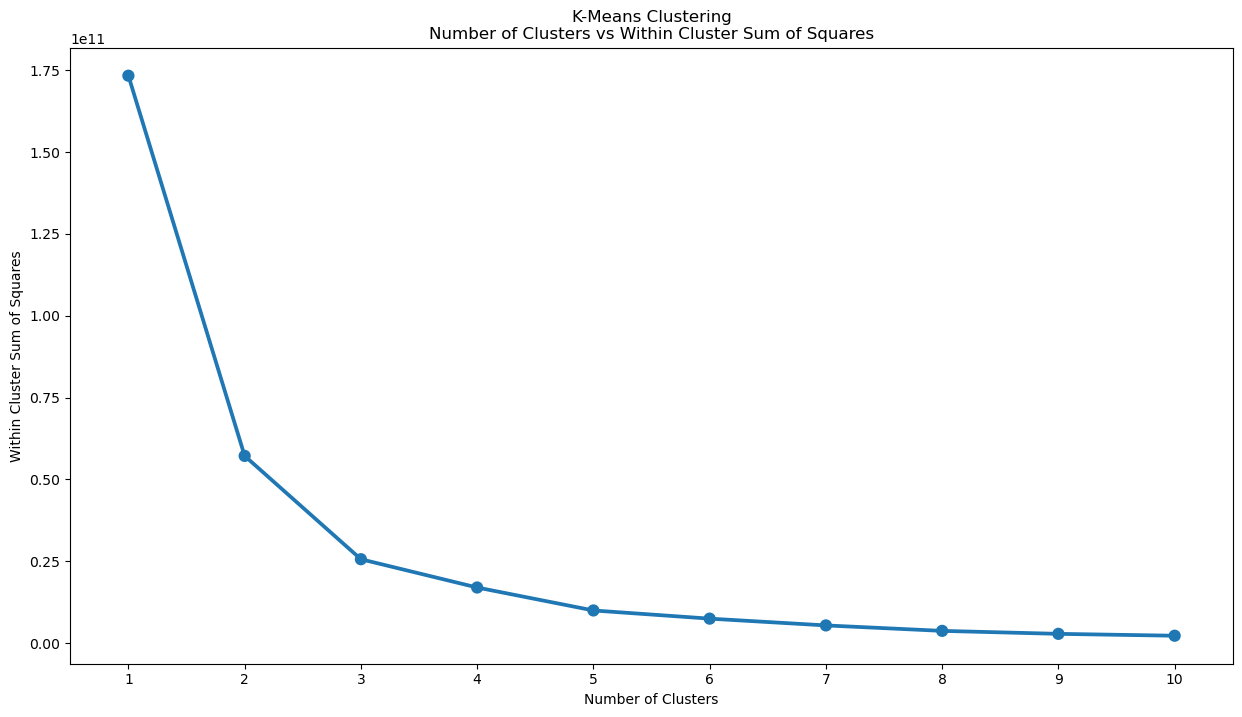

In [14]:
wcss = []
for k in range(0, 10):
    kmeans = KMeans(n_clusters=k+1, random_state=0).fit(df_rfm[['R', 'F', 'M']])
    wcss.append(kmeans.inertia_)

# plotting the wcss wrt cluster numbers
plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()

### b) Print the cluster centers of each customer segment and explain them intuitively

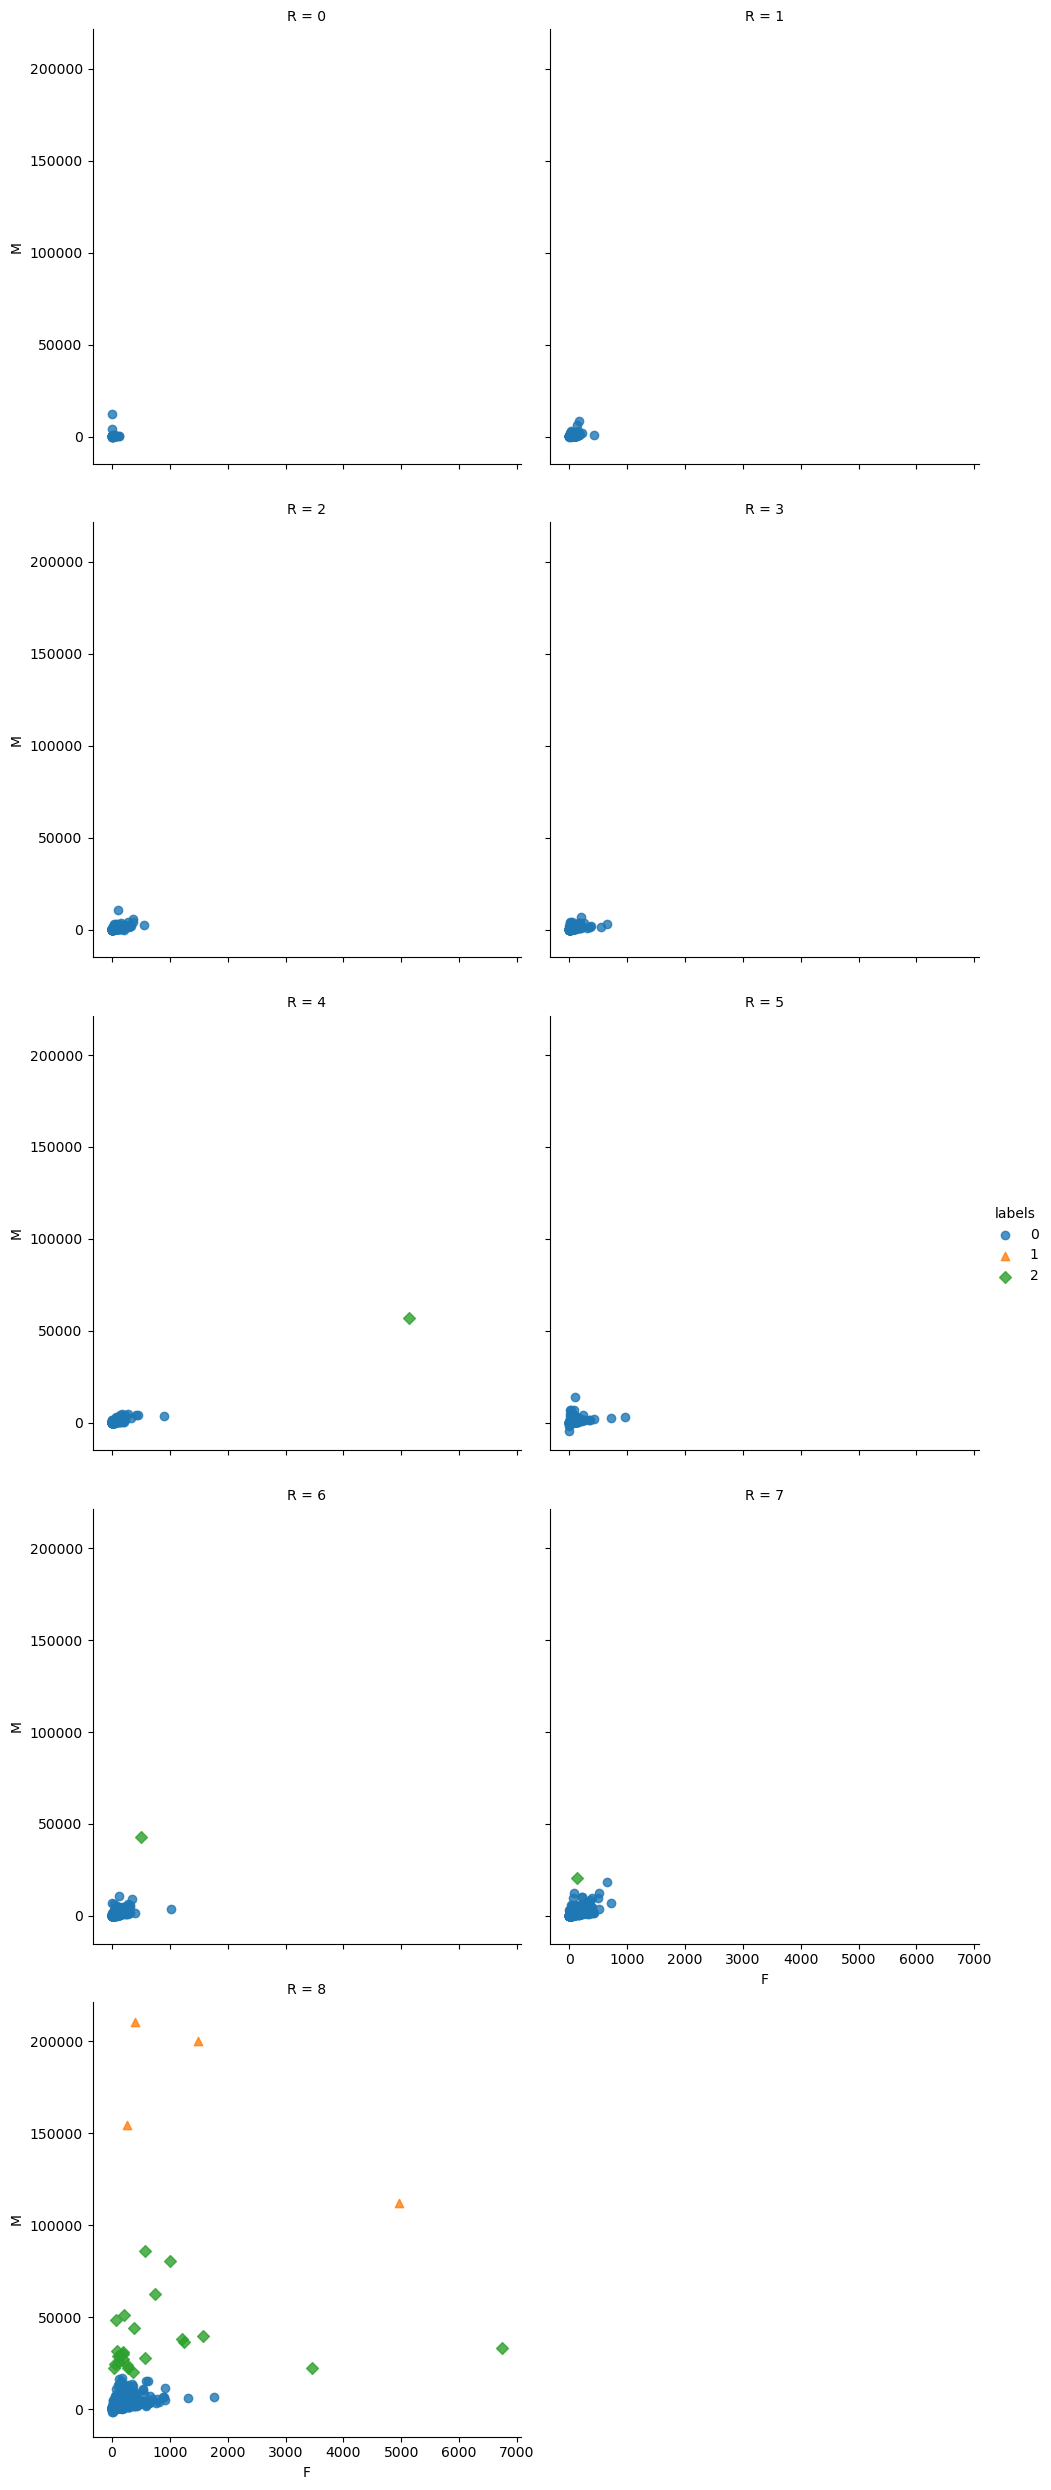

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_rfm[['R', 'F', 'M']])
df_rfm['labels'] = kmeans.labels_
sns.lmplot(x='F', y='M', col='R', hue='labels', data=df_rfm, col_wrap=2, fit_reg=False, markers=['o', '^', 'D'])

### c) Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method.from sklearn.cluster import AgglomerativeClustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(df_rfm[['R','F','M']])

### 7) from sklearn.cluster import AgglomerativeClustering

### a) Visualize the clusters using the dendrogram.

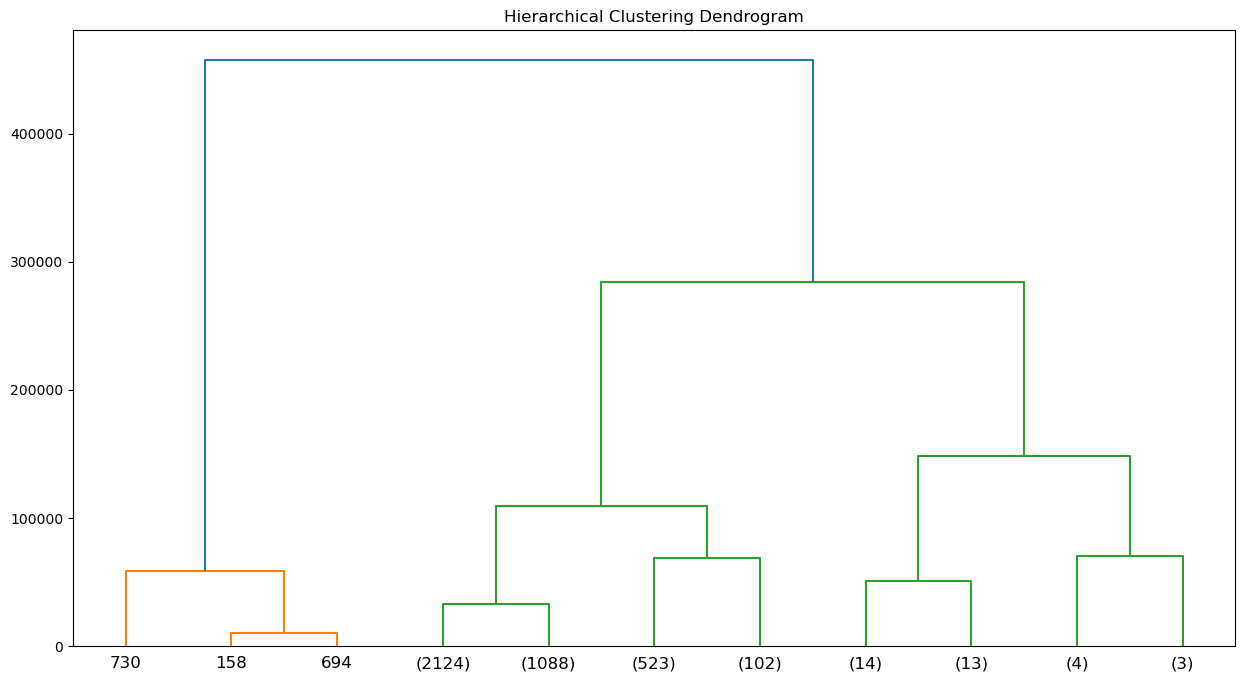

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(agglo, **kwargs):
    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.show()

### b) Compare the clusters obtained using KMeans vs. Agglomeration.

In [2]:
labels_kmeans = list(kmeans.labels_)
labels_agglo = list(agglo.labels_)
print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))

print()

print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))

NameError: name 'kmeans' is not defined